Dataset:

https://www.kaggle.com/sshikamaru/car-object-detection/download

Source:

https://www.kaggle.com/code/mdmosarrofhossen/car-detection-with-yolov5

## Importing required packages
* tesnsorflow, numpy, pandas
* cv2 for drawing rectangle on images
* tdqm for showing progress bar
* shutil for copying images

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os
import random

from tqdm.auto import tqdm
import shutil as sh
from PIL import Image

# Importing images for training our custom traning set
* **train_dir**: training images 
* **test_dir**: testing images
* **data**: value of boxes co-ordinates on images(xmin,ymin,xmax,ymax)

In [2]:
train_dir = "/kaggle/input/car-object-detection/data/training_images/"
test_dir = "/kaggle/input/car-object-detection/data/testing_images/"

print('Image(train): ', len(os.listdir(train_dir)))
print('Image(test): ', len(os.listdir(test_dir)))

Image(train):  1001
Image(test):  175


In [3]:
data = pd.read_csv("/kaggle/input/car-object-detection/data/train_solution_bounding_boxes (1).csv")

In [4]:
data.head()

image        xmin        ymin        xmax        ymax
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422

In [5]:
print(data.shape)
data.nunique()

(559, 5)


image    355
xmin     440
ymin     149
xmax     438
ymax     184
dtype: int64

# Showing training Images with green boxes on car

(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_9800.jpg
xmin          18.709395
ymin         192.414994
xmax           97.97815
ymax         231.301004
Name: 550, dtype: object
(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_21640.jpg
xmin          423.111433
ymin          175.786679
xmax          554.202605
ymax          228.605212
Name: 271, dtype: object
(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_17540.jpg
xmin          250.931983
ymin          183.611647
xmax          433.872648
ymax          252.080116
Name: 158, dtype: object
(380, 676, 3)
Name,xmin,ymin,xmax,ymax: image    vid_4_18200.jpg
xmin           27.881331
ymin           195.83816
xmax          158.483358
ymax          253.547297
Name: 179, dtype: object


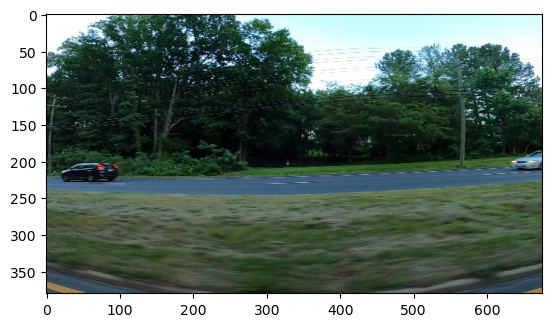

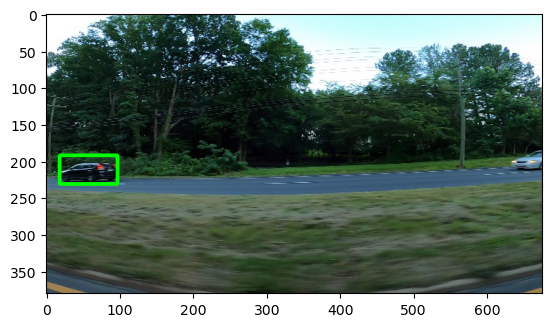

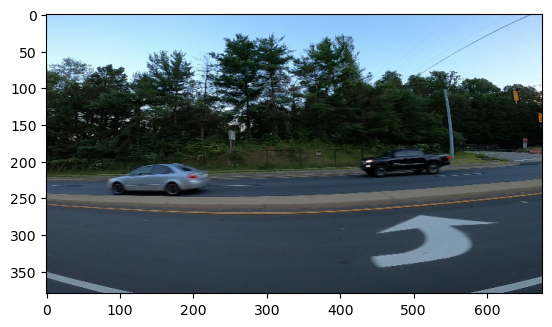

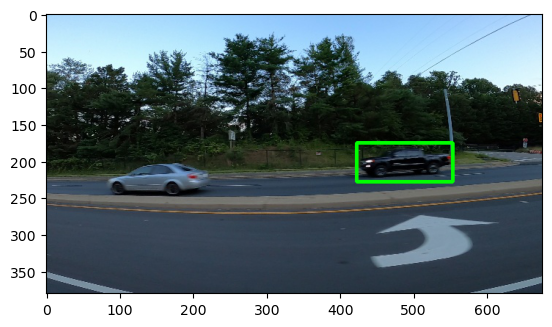

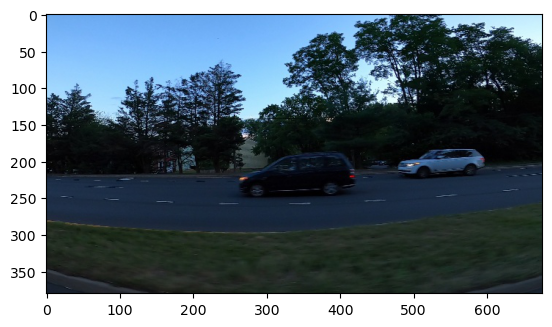

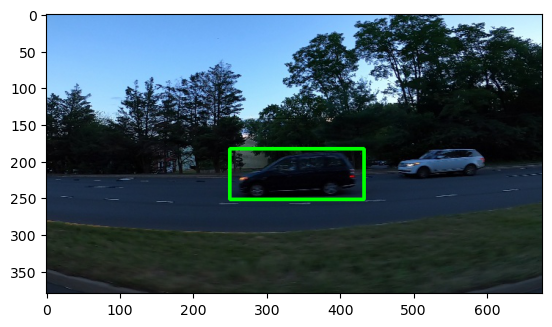

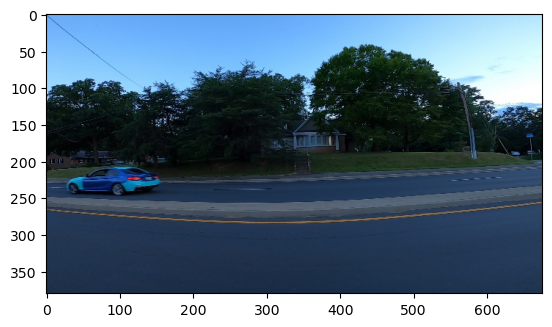

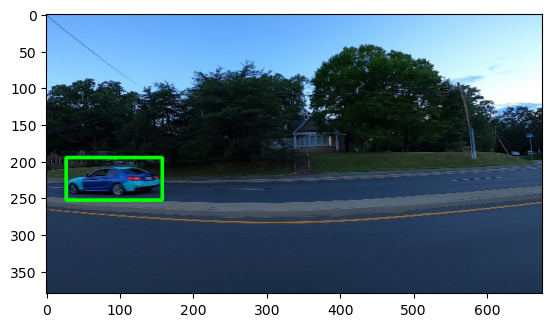

In [6]:
IMAGE_SHAPE = 0
for i in range(4):
    rand = np.random.randint(0, data.shape[0])
    random_row = data.iloc[rand]
    image = plt.imread(train_dir + random_row[0])
    plt.figure()
    plt.imshow(image)
    IMAGE_SHAPE = image.shape
    print(image.shape)
    print('Name,xmin,ymin,xmax,ymax:',random_row)
    point1 = (int(random_row[1]), int(random_row[2]))
    point2 = (int(random_row[3]), int(random_row[4]))
    cv2.rectangle(image, point1, point2, color=(0, 255, 0), thickness=3)
    plt.figure()
    plt.imshow(image)

# Cloning yolov5 from github

**Link:** https://github.com/ultralytics/yolov5 

In [7]:
!git clone https://github.com/ultralytics/yolov5
!cd yolov5
!pip install -r ./yolov5/requirements.txt

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Cloning into 'yolov5'...
remote: Enumerating objects: 15967, done.
remote: Total 15967 (delta 0), reused 0 (delta 0), pack-reused 15967
Receiving objects: 100% (15967/15967), 14.56 MiB | 25.75 MiB/s, done.
Resolving deltas: 100% (10966/10966), done.
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 kB 3.4 MB/s eta 0:00:00a 0:00:01
ERROR: Ignored the following versions that require a different python version: 1.22.0 Requires-Python >=3.8; 1.22.1 Requires-Python >=3.8; 1.22.2 Requires-Python >=3.8; 1.22.3 Requires-Python >=3.8; 1.22.4 Requires-Python >=3.8; 1.23.0 Requires-Python >=3.8; 1.23.0rc1 Requires-Python >=3.8; 1.23.0rc2 Requires-Python >=3.8; 1.23.0rc3 Requires-Python >=3.8; 1.23.1 R

# Data processing

Converting (xmin,ymin,xmax,ymax) to (x_center,y_center, w, h) as yolo5 required that format.

In [8]:
im_h, im_w, num_chanels = IMAGE_SHAPE
data["x_center"] = (data["xmax"] + data["xmin"])/2
data["y_center"] = (data["ymax"] + data["ymin"])/2
data["w"] = data["xmax"] - data["xmin"]
data["h"] = data["ymax"] - data["ymin"]
data["classes"] = 0
#Normalizing the values with image height and width
data["x_center"] = data["x_center"]/im_w
data["w"] = data["w"]/im_w
data["y_center"] = data["y_center"]/im_h
data["h"] = data["h"]/im_h
data.head()

image        xmin        ymin        xmax        ymax  x_center  \
0   vid_4_1000.jpg  281.259045  187.035071  327.727931  223.225547  0.450434   
1  vid_4_10000.jpg   15.163531  187.035071  120.329957  236.430180  0.100217   
2  vid_4_10040.jpg  239.192475  176.764801  361.968162  236.430180  0.444645   
3  vid_4_10020.jpg  496.483358  172.363256  630.020260  231.539575  0.833213   
4  vid_4_10060.jpg   16.630970  186.546010  132.558611  238.386422  0.110347   

   y_center         w         h  classes  
0  0.539817  0.068741  0.095238        0  
1  0.557191  0.155572  0.129987        0  
2  0.543678  0.181621  0.157014        0  
3  0.531451  0.197540  0.155727        0  
4  0.559122  0.171491  0.136422        0

In [9]:
index = list(data.image)
print(len(index))

559


# Training with yolov5 model

First we are going create a folder "data/fold0" and divide our training images into train and validation set. We are going to create a txt file for each images with box co-ordinates(x_center, y_center, w, h).

**STEP-1: Creating a txt file for each images inside labels folder**

validation set: "data/fold0/labels/val/"

training set: "data/fold0/labels/train/"

**STEP-2: Copying images from each Input to folder**

validation images: "data/fold0/images/val/"

training images: "data/fold0/images/train/"

**STEP-3: Creating dataset.yaml**

Creating a dataset.yaml file as required for custom training the yolov5 model,which contains path to training data and validation data.

**STEP-4: Training the model with custom data**

We are going to train the model with:

    - Batch size = 12
    - Epochs = 12
    - CONF_TRESHOLD = 0.6
    - IOU_THRESHOLD = 0.5
    - MODEL = 'yolov5x.pt' (large model for better output)

In [10]:
if not os.path.exists("data"):
    os.makedirs("data")
    os.makedirs("data/fold{}".format(0))

In [11]:
source = 'training_images'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(data.groupby('image')):
            if name in val_index:
                path2save = 'val/'
            else:
                path2save = 'train/'
            if not os.path.exists('data/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('data/fold{}/labels/'.format(fold)+path2save)
            with open('data/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('data/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('data/fold{}/images/{}'.format(fold,path2save))
            sh.copy("/kaggle/input/car-object-detection/data/{}/{}".format(source,name),'data/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))
        print("Copy done")
        print('Image(train): ', len(os.listdir('data/fold0/images/train/')))
        print('Image(test): ', len(os.listdir('data/fold0/images/val/')))

  0%|          | 0/355 [00:00<?, ?it/s]

Copy done
Image(train):  281
Image(test):  74


In [12]:
%%writefile dataset.yaml
path: /kaggle/working/data/fold0
train: /kaggle/working/data/fold0/images/train/
val: /kaggle/working/data/fold0/images/val/
test:

names:
    0: car

Writing dataset.yaml


In [13]:
IMG_SIZE = IMAGE_SHAPE[1]
CONF_TRESHOLD = 0.6
IOU_THRESHOLD = 0.5
MODEL = 'yolov5x.pt'

In [14]:
import time

start = time.perf_counter()

!python yolov5/train.py --batch 12 --epochs 12 --data dataset.yaml --weights {MODEL} --name my_model_5x

end = time.perf_counter()

total_time = end - start

print(f'Training time for {MODEL} model is: {total_time:0.2f} seconds')

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.7/616.7 kB 8.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 19.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.9/614.9 kB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.2/606.2 kB 40.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.5/605.5 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.6/605.6 kB 44.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.4.60
    Uninstalling opencv-python-4.5.4.60:
      Successfully uninstalled opencv-python-4.5.4.60
wandb: WARNING ⚠️ wandb is deprecated and wil

In [15]:
!ls yolov5/runs/train/my_model_5x/

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
F1_curve.png					  results.png
PR_curve.png					  train_batch0.jpg
P_curve.png					  train_batch1.jpg
R_curve.png					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
events.out.tfevents.1694956407.d9566c7d2865.86.0  val_batch0_pred.jpg
hyp.yaml					  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
opt.yaml					  val_batch2_pred.jpg
results.csv					  weights


# Detecting cars on test images

We are now going to use our custom trained model to detect cars on our testing images. The wieghts of our train model are inside "yolov5/runs/train/my_model_5x/weights/best.pt".

In [18]:
!python ./yolov5/detect.py --img {IMG_SIZE} --conf {CONF_TRESHOLD} --iou-thres {IOU_THRESHOLD} --source {test_dir} --weights yolov5/runs/train/my_model_5x/weights/best.pt

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
detect: weights=['yolov5/runs/train/my_model_5x/weights/best.pt'], source=/kaggle/input/car-object-detection/data/testing_images/, data=yolov5/data/coco128.yaml, imgsz=[676, 676], conf_thres=0.6, iou_thres=0.5, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-218-g9e97ac3 Python-3.7.12 torch-1.12.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 322 layers, 86173414 parameters, 0 gradients, 203.8 GFLOPs
WARNING ⚠️ --img-size [676, 676] must be multiple of max stride 32, updating to [704, 704]
image 1/175 /kaggle/input/car-object-detection/data/testing_images/vid_5_25100.jpg

In [19]:
!ls yolov5/runs/detect/exp/

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
vid_5_25100.jpg  vid_5_27460.jpg  vid_5_28540.jpg  vid_5_30640.jpg
vid_5_25120.jpg  vid_5_27480.jpg  vid_5_28560.jpg  vid_5_30660.jpg
vid_5_25140.jpg  vid_5_27500.jpg  vid_5_28580.jpg  vid_5_30680.jpg
vid_5_25160.jpg  vid_5_27520.jpg  vid_5_28600.jpg  vid_5_30700.jpg
vid_5_25180.jpg  vid_5_27540.jpg  vid_5_28620.jpg  vid_5_30720.jpg
vid_5_25200.jpg  vid_5_27560.jpg  vid_5_28640.jpg  vid_5_30740.jpg
vid_5_25220.jpg  vid_5_27580.jpg  vid_5_28660.jpg  vid_5_30760.jpg
vid_5_25240.jpg  vid_5_27600.jpg  vid_5_28680.jpg  vid_5_30820.jpg
vid_5_25260.jpg  vid_5_27620.jpg  vid_5_28700.jpg  vid_5_30840.jpg
vid_5_26320.jpg  vid_5_27640.jpg  vid_5_29000.jpg  vid_5_30860.jpg
vid_5_26400.jpg  vid_5_27660.jpg  vid_5_29020.jpg  vid_5_30920.jpg
vid_5_26420.jpg  vid_5_27680.jpg  vid_5_29040.jpg  vid_5_30940.jpg
vid_5_26560.jpg  vid_5_27700.jpg  vid_5_29060.jpg  vid_5_31020.jpg
vid_5_26580.jpg  vid_5_27720.jp

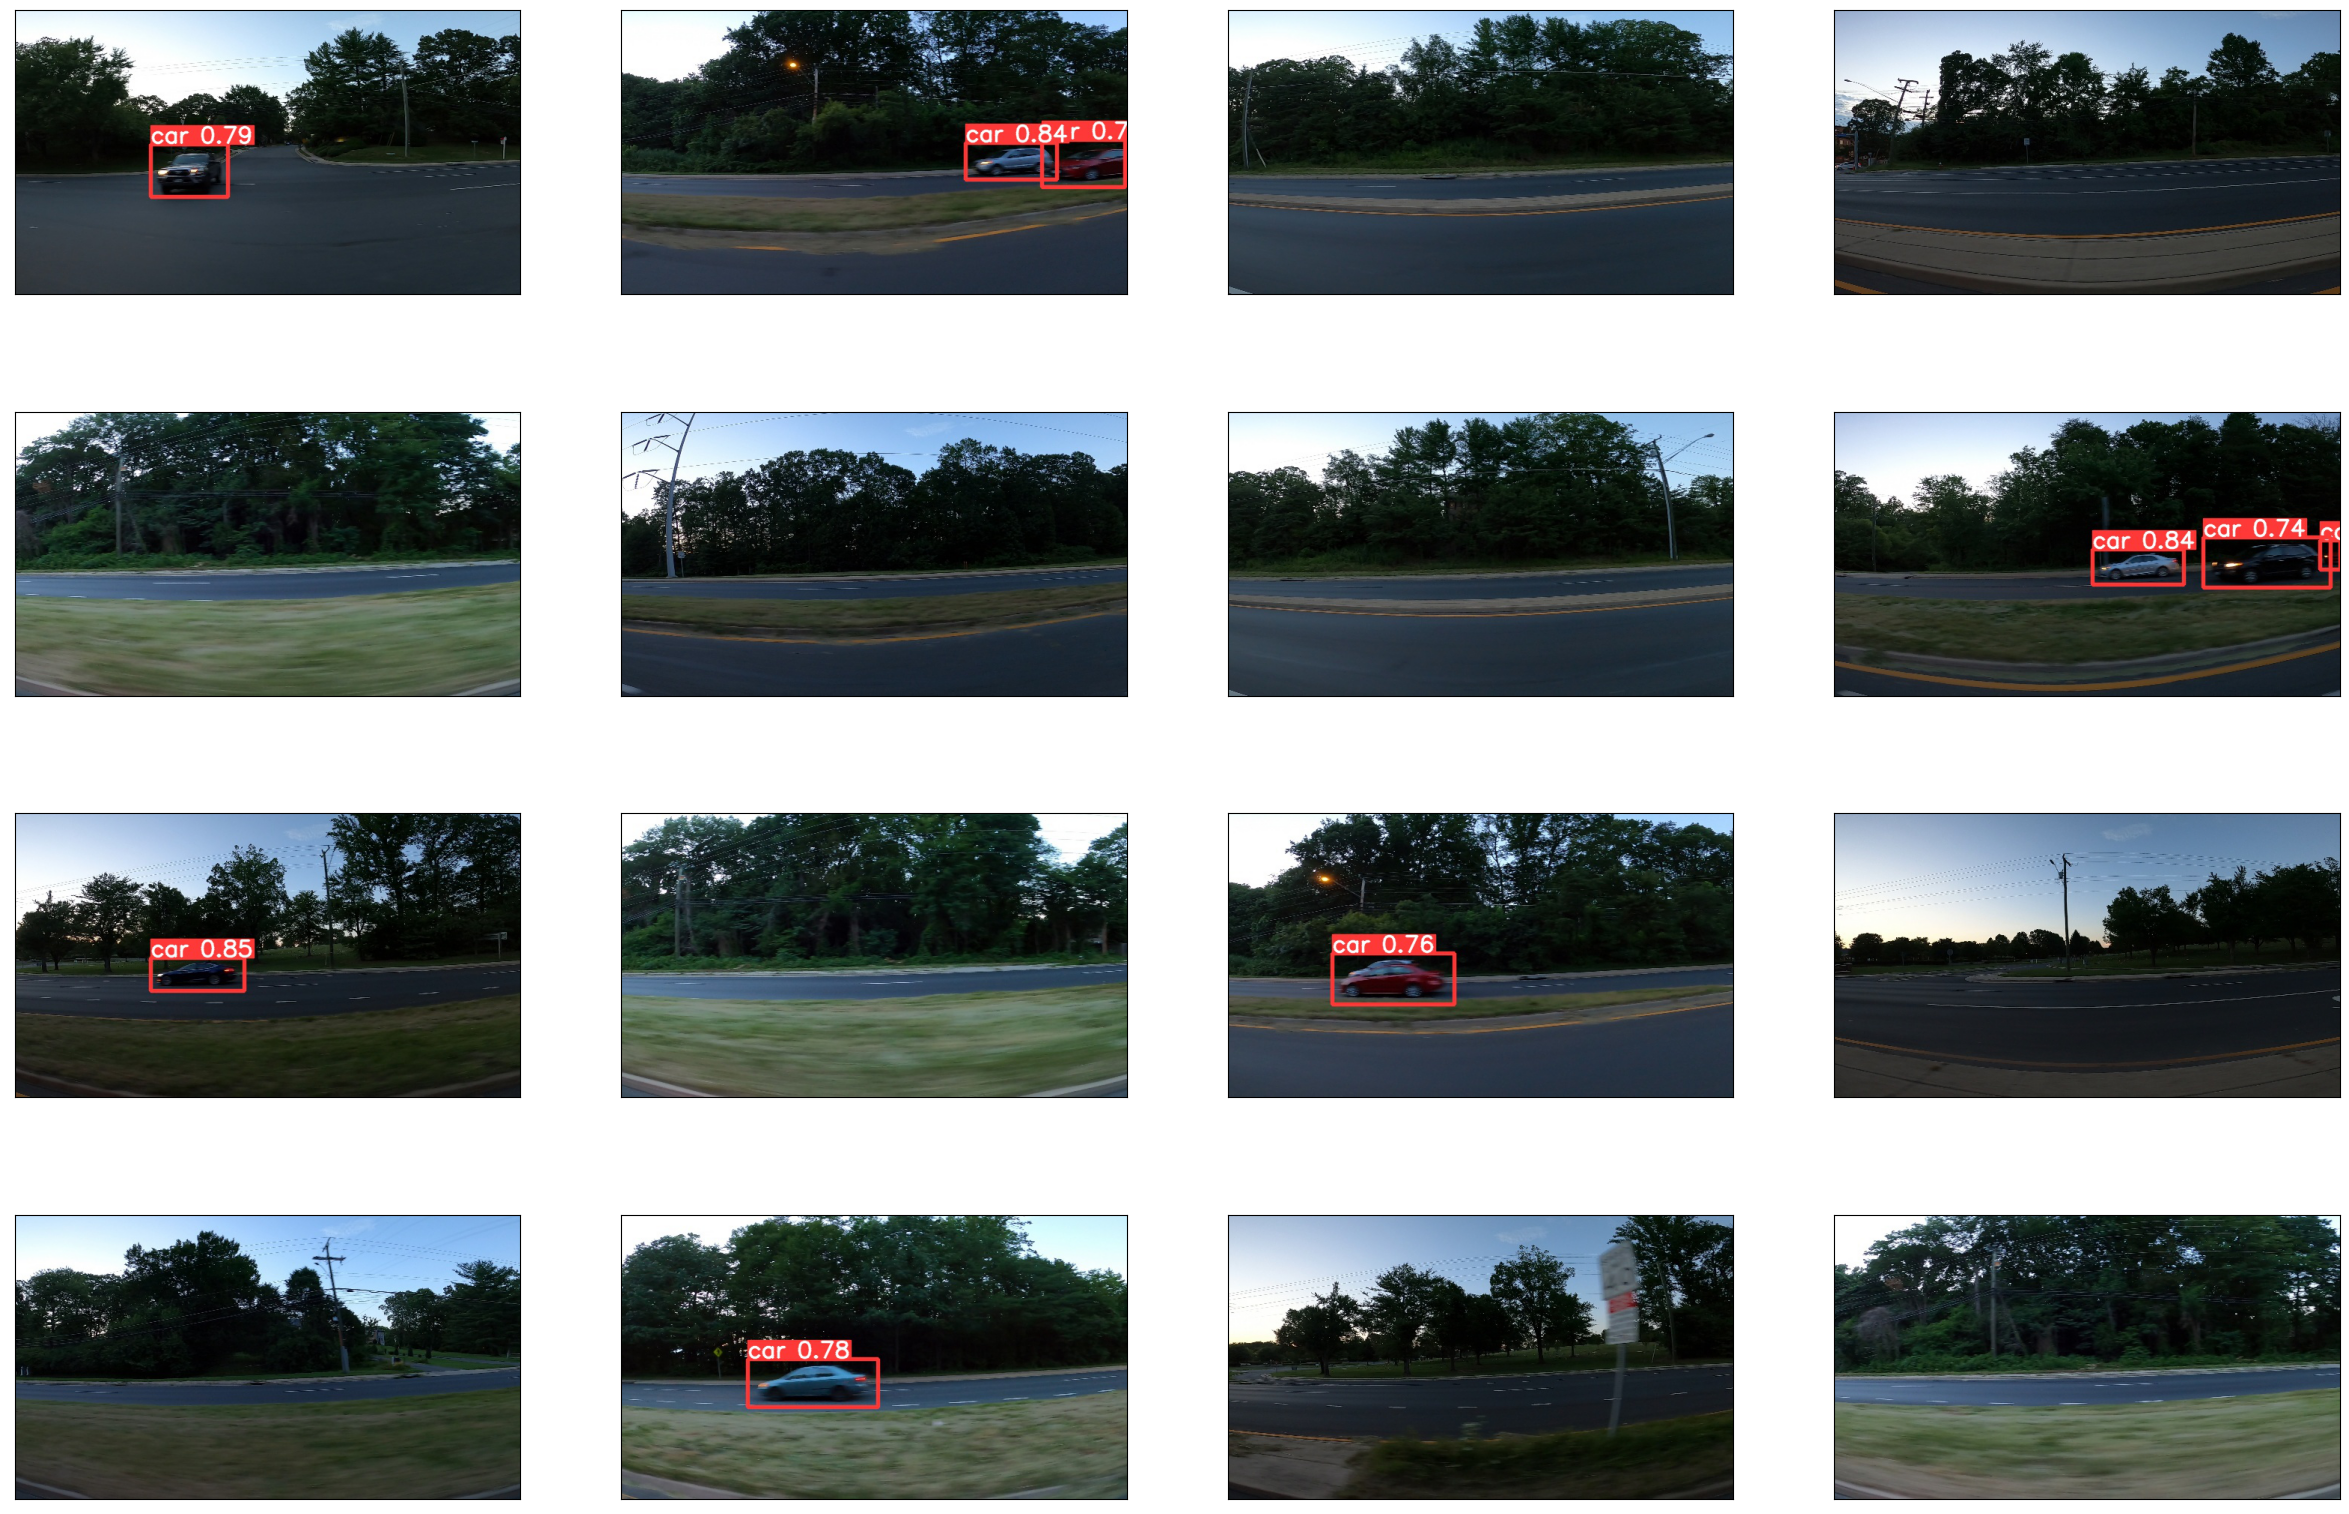

In [20]:
pred_dir = './yolov5/runs/detect/exp'
file_paths = []
flist = os.listdir(pred_dir)
for file in flist:
    fpath = os.path.join(pred_dir, file)
    file_paths.append(fpath)

plt.figure(figsize=(30, 20))
for i in range(16):
    random = np.random.randint(0, len(file_paths) - 1)
    plt.subplot(4, 4, i + 1)
    img_path = file_paths[random]
    img = plt.imread(img_path)
    plt.imshow(img)
    #plt.title('Predictions', size=10, color="black") 
    plt.xticks([])
    plt.yticks([])
    
plt.show()